<a href="https://colab.research.google.com/github/RanaMudassarRasool/imageProcessing2024/blob/main/L2_Image_Processing_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Processing Fundamentals**
1. Image acquisition and representation
2. Image enhancement techniques (noise reduction, contrast adjustment, sharpening)
3. Image restoration
4. Geometric transformations (scaling, rotation, translation, affine transformations)
5. Image segmentation (thresholding, edge detection, region-based segmentation)

**Feature Extraction and Description**

1. Interest point detection (Harris corner detector, SIFT, SURF)
2. Feature descriptors (HOG, SIFT, SURF)
3. Feature matching and comparison
**Image Classification**

1. Image classification pipeline
2. Traditional machine learning methods (SVM, Random Forest)
3. Deep learning for image classification (Convolutional Neural Networks - CNNs)
**Transfer learning and fine-tuning**
1. Object Detection
2. Object detection vs. image classification
3. Traditional object detection methods (Viola-Jones, HOG + SVM)
4. Deep learning for object detection (Faster R-CNN, YOLO, SSD)
**Image Segmentation**
1. Semantic segmentation vs. instance segmentation
2. Traditional segmentation methods (region growing, watershed)
3. Deep learning for image segmentation (Fully Convolutional Networks - FCNs, Mask R-CNN)
**Advanced Topics (Optional)**
1. Image registration
2. 3D computer vision
3. Video analysis
5. Deep learning architectures (ResNet, DenseNet, EfficientNet)
6. Generative models (GANs)
**Practical Projects**
1. Image filtering and enhancement projects
2. Object detection projects
3. Image classification projects
4. Image segmentation projects

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

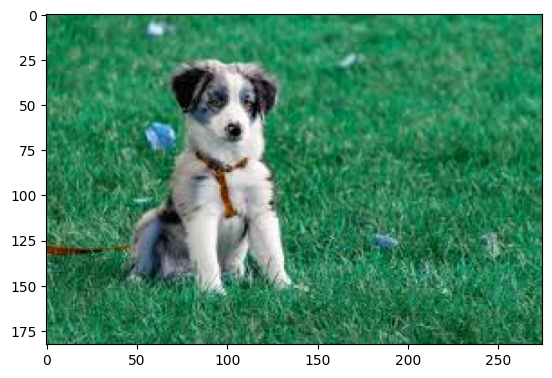

In [3]:
# Assuming your image is in 'My Drive/images/my_image.jpg'
image_path = 'images.jfif'
# Read the image using OpenCV
img = cv2.imread(image_path)

# Display the image
plt.imshow(img)
plt.show()

Image Representation

In [4]:
print("Image shape:", img.shape)
print("Image data type:", img.dtype)

Image shape: (183, 275, 3)
Image data type: uint8


**Color Channels:** You can access individual color channels using indexing. For example,

img[:, :, 0]

 accesses the red channel.




array([[50, 43, 52, ..., 27, 27, 23],
       [39, 38, 53, ..., 26, 26, 24],
       [27, 29, 50, ..., 27, 27, 25],
       ...,
       [62, 40, 69, ...,  0, 38, 74],
       [72, 32, 75, ...,  3, 16, 30],
       [50, 13, 59, ..., 50, 30, 18]], dtype=uint8)
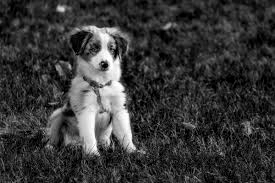

In [5]:
img[:, :, 0]

In [6]:
img.shape

(183, 275, 3)

**Pixel Values**: Each pixel value represents the intensity of a color component. You can manipulate these values to perform image processing operations.

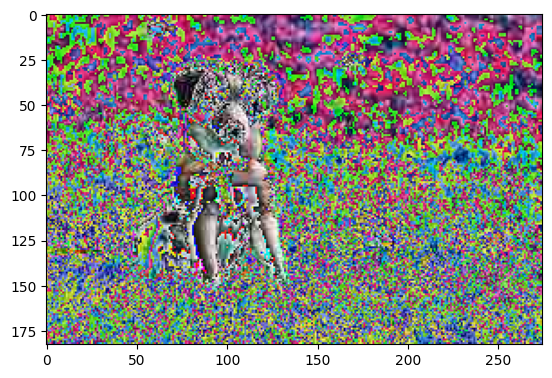

In [9]:
adjusted_img = np.clip(img * 4, 0, 255).astype(np.uint8)
# Display the image
plt.imshow(adjusted_img)
plt.show()

array([[ 92,  83,  86, ..., 101,  99,  95],
       [ 81,  78,  87, ..., 100,  98,  94],
       [ 70,  71,  86, ...,  99,  97,  93],
       ...,
       [ 91,  73, 109, ...,  31,  72, 108],
       [103,  66, 117, ...,  32,  48,  62],
       [ 83,  49, 101, ...,  76,  59,  47]], dtype=uint8)
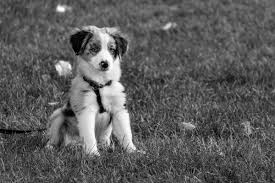

In [11]:
# Access the red channel (index 2)
red_channel = img[:, :, 2]
red_channel

In [12]:
# Print a small portion of the channel values
print(red_channel[0:5, 0:5])

[[92 83 86 86 76]
 [81 78 87 92 83]
 [70 71 86 95 88]
 [69 68 81 90 84]
 [76 70 76 79 73]]


In [13]:
# Access the green channel (index 1)
green_channel = img[:, :, 1]


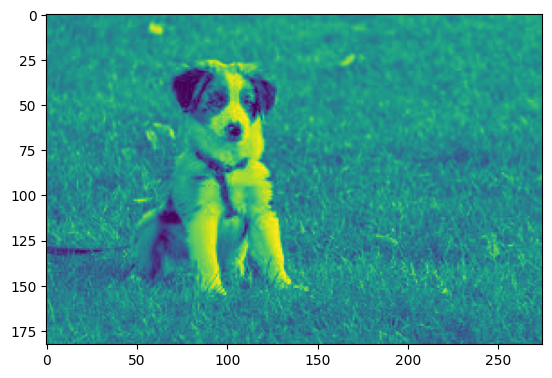

In [14]:
plt.imshow(green_channel)
plt.show()

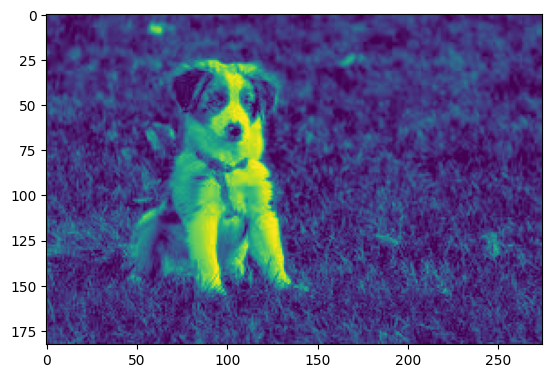

In [15]:
channel = img[:, :, 0]
plt.imshow(channel)
plt.show()

# Image enhancement techniques (noise reduction, contrast adjustment, sharpening)

Grayscale Filter

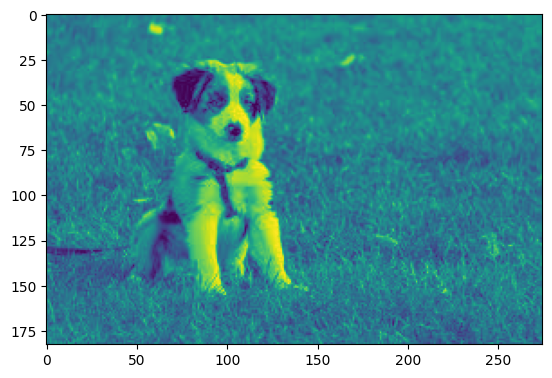

In [17]:
# Calculate average of RGB channels
gray = 0.2126 * img[:, :, 2] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 0]

# Convert to uint8
gray = gray.astype(np.uint8)
plt.imshow(gray)
plt.show()

Invert Filter

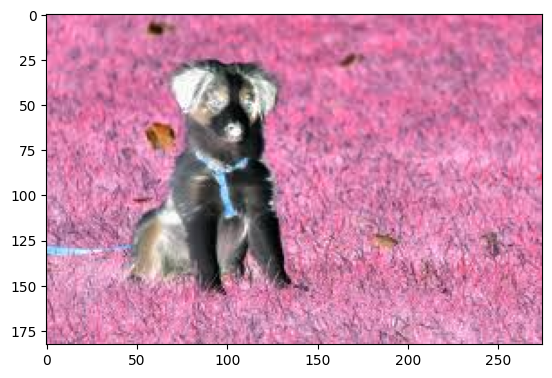

In [18]:
inverted_img = 255 - img
plt.imshow(inverted_img)
plt.show()


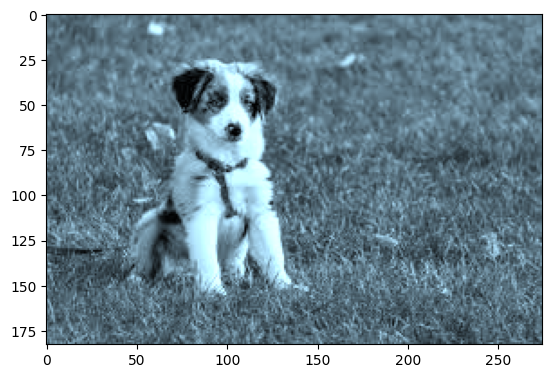

In [19]:
sepia_filter = np.array([[0.272, 0.534, 0.131],
                        [0.349, 0.686, 0.168],
                        [0.393, 0.769, 0.189]])

sepia_img = np.dot(img, sepia_filter.T)
sepia_img = np.clip(sepia_img, 0, 255).astype(np.uint8)

plt.imshow(sepia_img)
plt.show()

Emboss Filter

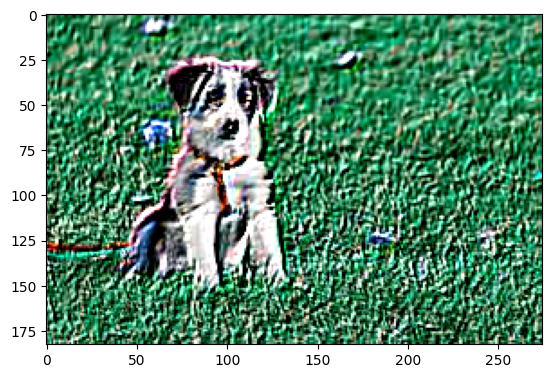

In [20]:
emboss_kernel = np.array([[-2, -1, 0],
                         [-1,  1,  1],
                         [ 0,  1,  2]])

embossed_img = cv2.filter2D(img, -1, emboss_kernel)
plt.imshow(embossed_img)
plt.show()

Edge Detection

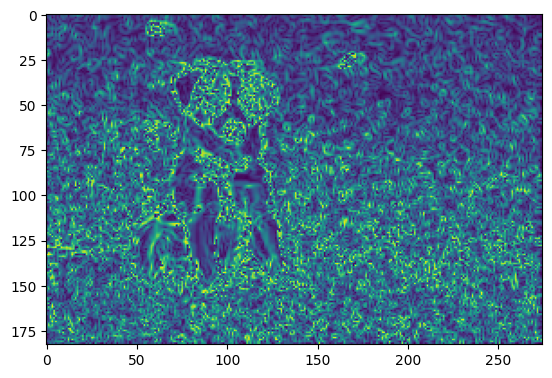

In [21]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Combine gradients
sobel = np.sqrt(sobelx**2 + sobely**2)

# Convert to uint8
sobel = np.uint8(sobel)

plt.imshow(sobel)
plt.show()

Cartoon Effect

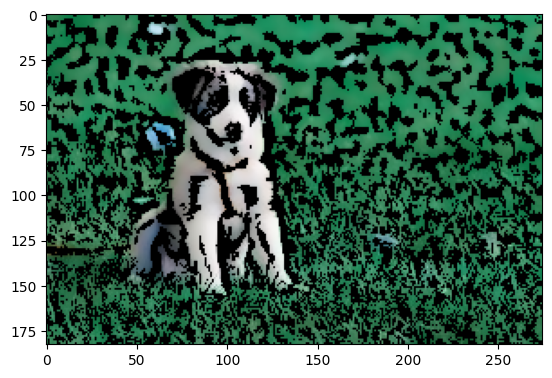

In [23]:

# Bilateral filter for edge preservation
filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Convert to grayscale and apply thresholding
gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

# Create cartoon effect by combining details
cartoon = cv2.bitwise_and(filtered, filtered, mask=thresh)

plt.imshow(cartoon)
plt.show()

Creating your own filters involves manipulating pixel values in an image. This can be done by applying mathematical operations, using kernels (matrices), or other techniques.

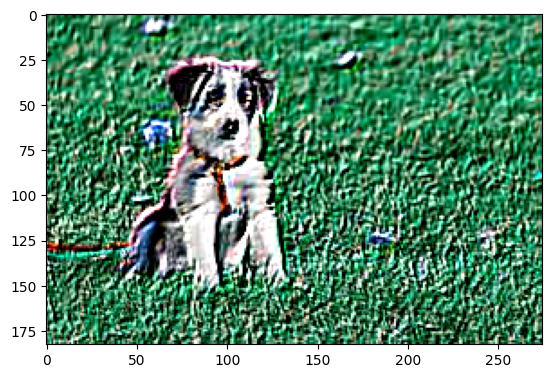

In [25]:
kernel = np.array([[-2, -1, 0],
                     [-1,  1,  1],
                     [ 0,  1,  2]])
embossed = cv2.filter2D(img, -1, kernel)

plt.imshow(embossed)
plt.show()

Try different kernel values: Experiment with different numbers in the kernel to achieve different effects.

**Combine filters**: Apply multiple filters sequentially for complex results.

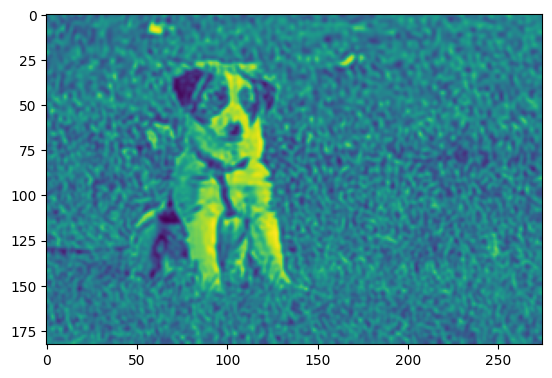

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sharpening kernel
sharpen_kernel = np.array([[-1, -1, -1],
                          [-1,  9, -1],
                          [-1, -1, -1]])

# Sharpened image
sharp = cv2.filter2D(gray, -1, sharpen_kernel)

# Blurring
blurred = cv2.GaussianBlur(sharp, (5, 5), 0)

plt.imshow(blurred)
plt.show()

**Color channels:** Manipulate individual color channels for specific effects.

Basic Manipulation

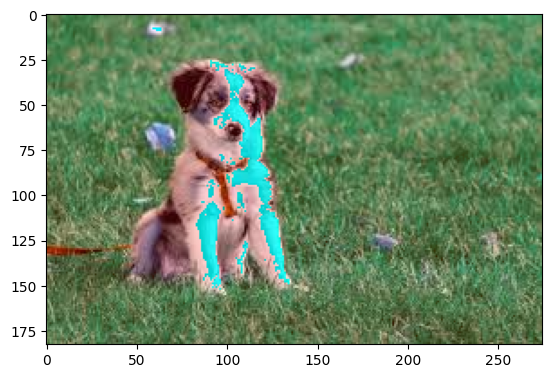

In [27]:
# Access individual channels
b, g, r = cv2.split(img)

# Modify a channel
b = b + 50  # Increase blue channel by 50

# Merge channels back
merged_img = cv2.merge([b, g, r])

plt.imshow(merged_img)
plt.show()


Example: Sepia Tone

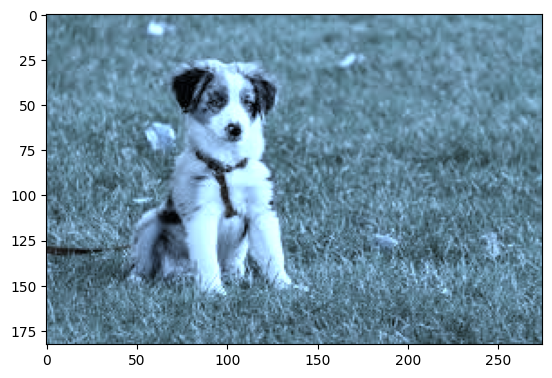

In [28]:
b, g, r = cv2.split(img)

# Sepia tone effect
b = 0.272 * r + 0.534 * g + 0.131 * b
g = 0.349 * r + 0.686 * g + 0.168 * b
r = 0.393 * r + 0.769 * g + 0.189 * b

# Clip values to ensure they are within the valid range
b = np.clip(b, 0, 255).astype(np.uint8)
g = np.clip(g, 0, 255).astype(np.uint8)
r = np.clip(r, 0, 255).astype(np.uint8)

sepia = cv2.merge([b, g, r])

plt.imshow(sepia)
plt.show()

# Image Restoration Without Functions

Noise Reduction

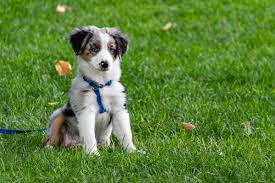

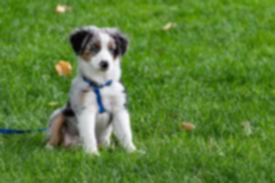

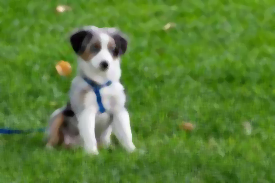

In [29]:
import cv2
from google.colab.patches import cv2_imshow

# Gaussian Blur
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Median Filter
median = cv2.medianBlur(img, 5)

# Display the original image, grayscale image, and equalized image
cv2_imshow(img)
cv2_imshow(blurred)
cv2_imshow(median)


Deblurring

In [33]:
# Blurring kernel
kernel = np.ones((5, 5)) / 25

# Convert to float32
img_float32 = np.float32(img)
kernel_float32 = np.float32(kernel)

# DFT (using None for axes argument)
img_fft = np.fft.fft2(img_float32)
kernel_fft = np.fft.fft2(kernel_float32, None)  # No axes specified

# Division mask
div_mask = np.where(kernel_fft == 0, 1, kernel_fft)

# Pad the kernel FFT to match the image FFT shape
kernel_fft_padded = np.pad(kernel_fft, ((0, img_fft.shape[0] - kernel_fft.shape[0]), (0, img_fft.shape[1] - kernel_fft.shape[1])), mode='constant')

# Deconvolution
deconvolved = np.multiply(img_fft, 1 / kernel_fft_padded)

# Inverse DFT
deconvolved_img = np.fft.ifft2(deconvolved)
deconvolved_img = np.uint8(np.clip(np.abs(deconvolved_img), 0, 255))

cv2_imshow('Original', img)
cv2_imshow('Deblurred', deconvolved_img)

# Geometric transformations (scaling, rotation, translation, affine transformations)

**Geometric Transformations**

Geometric transformations are fundamental operations in image processing, allowing us to manipulate images in various ways. Let's explore the key types

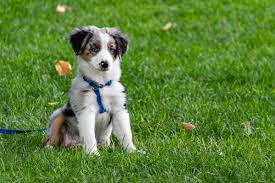

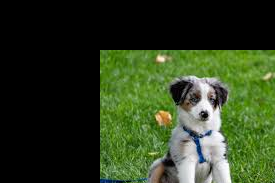

In [35]:
# Translation matrix
M = np.float32([[1, 0, 100], [0, 1, 50]])

# Apply translation
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

cv2_imshow( img)
cv2_imshow( shifted)

**Scaling**

Scaling changes the size of an image by a specified factor.

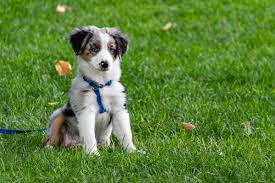

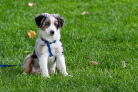

In [37]:
img = cv2.imread('images.jfif')

# Scaling factor
scale = 0.5

# Resize image
resized = cv2.resize(img, None, fx=scale, fy=scale)

cv2_imshow(img)
cv2_imshow( resized)

**Rotation**

Rotation involves rotating an image by a specified angle around a pivot point.

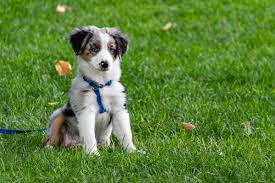

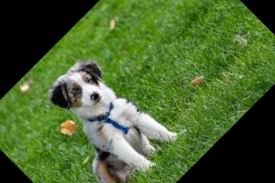

In [38]:
# Rotation angle
angle = 45

# Get image dimensions
height, width = img.shape[:2]

# Calculate rotation matrix
M = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

# Apply rotation
rotated = cv2.warpAffine(img, M, (width, height))

cv2_imshow( img)
cv2_imshow( rotated)

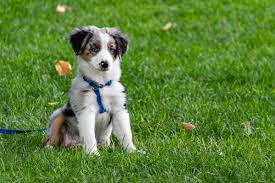

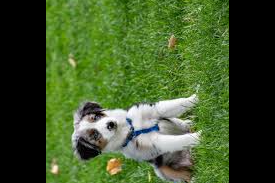

In [39]:
# Rotation angle
angle = 90

# Get image dimensions
height, width = img.shape[:2]

# Calculate rotation matrix
M = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

# Apply rotation
rotated = cv2.warpAffine(img, M, (width, height))

cv2_imshow( img)
cv2_imshow( rotated)

**Affine Transformations**

Affine transformations are more general transformations that include scaling, rotation, translation, and shearing. They preserve straight lines and parallelism but not necessarily angles or lengths.

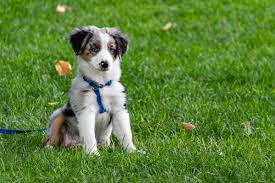

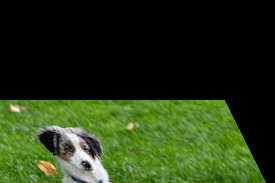

In [40]:
# Affine transformation matrix
M = np.float32([[1, 0.5, -50], [0, 1, 100]])

# Apply affine transformation
affine_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

cv2_imshow(img)
cv2_imshow( affine_img)

**Power-Law (Gamma) Transformations**

Power-Law (Gamma) Transformations are a type of image processing technique that involve applying a non-linear transformation to the pixel values of an image. The transformation is based on a power-law function that raises the pixel values to a specific power, which can be controlled by the user. This can be expressed mathematically as:

 V_out = V_in^gamma

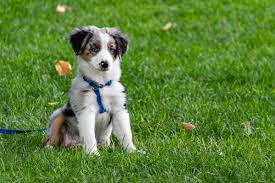

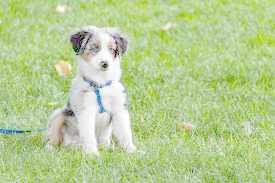

In [41]:
# Define the gamma value
gamma = 0.3

# Apply the gamma transformation
gamma_img = np.power(img/255, gamma) * 255

# Convert the image to uint8 data type
gamma_img = np.uint8(gamma_img)

# Display the original and gamma-transformed images side by side
cv2_imshow( img)
cv2_imshow(gamma_img)

 **Logarithmic Transformations**

Logarithmic Transformations are a type of image processing technique that involve applying a logarithmic function to the pixel values of an image. This transformation can be used to enhance the contrast of images with low intensity values, such as images with mostly dark or shadowy areas. The logarithmic transformation is given by the following equation:

 V_out = c * log(1 + V_in)

<ipython-input-42-2ad97a5fc9e7>:5: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + img)
<ipython-input-42-2ad97a5fc9e7>:8: RuntimeWarning: invalid value encountered in cast
  log_img = np.uint8(log_img)


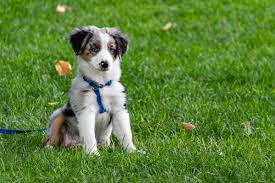

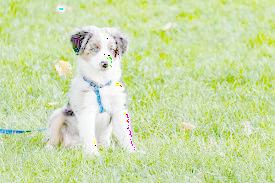

In [42]:
# Define the constant value
c = 255 / np.log(1 + np.max(img))

# Apply the logarithmic transformation
log_img = c * np.log(1 + img)

# Convert the image to uint8 data type
log_img = np.uint8(log_img)

# Display the original and logarithmically transformed images side by side
cv2_imshow(img)
cv2_imshow( log_img)

# Image segmentation (thresholding, edge detection, region-based segmentation)

**Image Segmentation**

Image segmentation is the process of dividing an image into meaningful regions or objects. It's a fundamental task in computer vision with applications in various fields. Let's explore some common techniques:

**Edge Detection**

Edge detection aims to identify points in an image where the image brightness changes sharply.

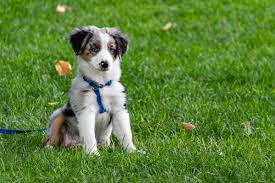

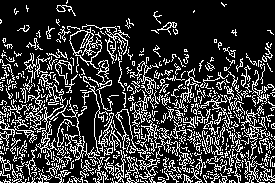

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

cv2_imshow( img)
cv2_imshow( edges)

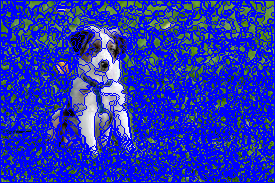

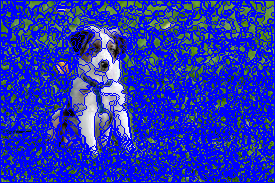

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Compute gradient
grad = cv2.Laplacian(blurred, cv2.CV_8U)

# Create markers
ret, thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
markers = cv2.connectedComponents(thresh)[1] + 1

# Define unknown region as 0
unknown = 0

# Watershed algorithm
markers[markers == 1] = 0
markers = cv2.watershed(img, markers)

img[markers == -1] = [255, 0, 0]

cv2_imshow( img)
cv2_imshow( img)